In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [4]:
# libraries

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.subplots as tls
import seaborn as sns
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import tarfile
import urllib
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [8]:
# read the unlabelled data 
X = pd.read_csv ('x_train_gr_smpl.csv')
print(X.shape)
print(X)

(9690, 2304)
          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...   2294  2295  2296   2297  2298  2299  2

In [9]:
# read the class attribute file into Y datafram
Y = pd.read_csv('y_train_smpl.csv')
Y.columns = ['Class']
print(Y.shape)
print(Y)

(9690, 1)
      Class
0         0
1         0
2         0
3         0
4         0
...     ...
9685      9
9686      9
9687      9
9688      9
9689      9

[9690 rows x 1 columns]


In [10]:
#join the two such that Y is the last column

XYraw = pd.concat([X,Y], axis=1)

#check the concatination
print(XYraw)


          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...  2295  2296   2297  2298  2299  2300   2301   2302   

In [11]:
# check for NaNs
anyNans = XYraw.isnull().sum().sum()
#print NaN count
print('\nNaN Count : ' + str(anyNans)) 


NaN Count : 0


In [13]:
#randomize

XYraw = XYraw.sample(frac=1).reset_index(drop=True)
print(XYraw)

          0      1      2      3      4      5      6      7      8      9  \
0      19.0   17.0   16.0   15.0   15.0   14.0   14.0   13.0   12.0   12.0   
1      35.0   36.0   36.0   36.0   36.0   40.0   40.0   42.0   44.0   42.0   
2      34.0   34.0   36.0   36.0   35.0   33.0   34.0   34.0   32.0   31.0   
3      97.0  101.0  108.0  127.0  135.0  124.0  124.0  128.0  132.0  139.0   
4       9.0    9.0    8.0    8.0    8.0    8.0    9.0    9.0    8.0    8.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   42.0   24.0   21.0   35.0   41.0   31.0   29.0   23.0   28.0   47.0   
9686  122.0  120.0  122.0  145.0  180.0  189.0  194.0  194.0  193.0  195.0   
9687   68.0   66.0   59.0   41.0   29.0   25.0   25.0   28.0   30.0   33.0   
9688   18.0   20.0   22.0   23.0   29.0   37.0   36.0   31.0   30.0   30.0   
9689  152.0  153.0  152.0  154.0  152.0  152.0  154.0  152.0  153.0  152.0   

      ...   2295   2296   2297   2298   2299   2300   2301   23

In [15]:
# save the labels to a Pandas series target
target = XYraw['Class']
# Drop the label feature
XYraw.drop("Class",axis=1,inplace=True)

In [16]:
print(XYraw)

          0      1      2      3      4      5      6      7      8      9  \
0      19.0   17.0   16.0   15.0   15.0   14.0   14.0   13.0   12.0   12.0   
1      35.0   36.0   36.0   36.0   36.0   40.0   40.0   42.0   44.0   42.0   
2      34.0   34.0   36.0   36.0   35.0   33.0   34.0   34.0   32.0   31.0   
3      97.0  101.0  108.0  127.0  135.0  124.0  124.0  128.0  132.0  139.0   
4       9.0    9.0    8.0    8.0    8.0    8.0    9.0    9.0    8.0    8.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   42.0   24.0   21.0   35.0   41.0   31.0   29.0   23.0   28.0   47.0   
9686  122.0  120.0  122.0  145.0  180.0  189.0  194.0  194.0  193.0  195.0   
9687   68.0   66.0   59.0   41.0   29.0   25.0   25.0   28.0   30.0   33.0   
9688   18.0   20.0   22.0   23.0   29.0   37.0   36.0   31.0   30.0   30.0   
9689  152.0  153.0  152.0  154.0  152.0  152.0  154.0  152.0  153.0  152.0   

      ...   2294   2295   2296   2297   2298   2299   2300   23

In [17]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
Xs = XYraw.values
X_std = StandardScaler().fit_transform(Xs)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance


In [18]:
#PCA analysis

#standardizing the data

from sklearn.preprocessing import StandardScaler
Xs = XYraw.values
X_std = StandardScaler().fit_transform(Xs)

mean_vec=np.mean(X_std,axis=0)
cov_mat=np.cov(X_std.T)
eigvalues ,eigvectors =np.linalg.eig(cov_mat)

eigpairs=[(np.abs(eigvalues[i]),eigvectors[:,i] )for i in range(len(eigvalues))]


eigpairs.sort(key=lambda x:x[0],reverse=True)
   
tot=sum(eigvalues)
var_exp=[(i/tot)*100 for i in sorted(eigvalues,reverse=True)]
cum_var_exp=np.cumsum(var_exp)

In [20]:
#Using plotly to visualise individual 
#explained variance and cummulative explained variance


trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_var_exp,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
   
    line = dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
 
     line = dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,1)


fig.layout.title='explained Variance plots'
fig.layout.xaxis=dict(range=[0,800],title='Feature columns')
fig.layout.yaxis=dict(range=[0,100],title='explained variance')


py.iplot(fig,filename='inset example')

This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



In [52]:
pca=PCA(200)
pca.fit(X_std)

PCA(n_components=200)

In [53]:
X_pca=pca.transform(X_std)

In [54]:
X_pca.shape

(9690, 200)

In [55]:
X_std.shape

(9690, 2304)

In [56]:
eigenvalues=pca.components_
eigenvalues.shape

(200, 2304)

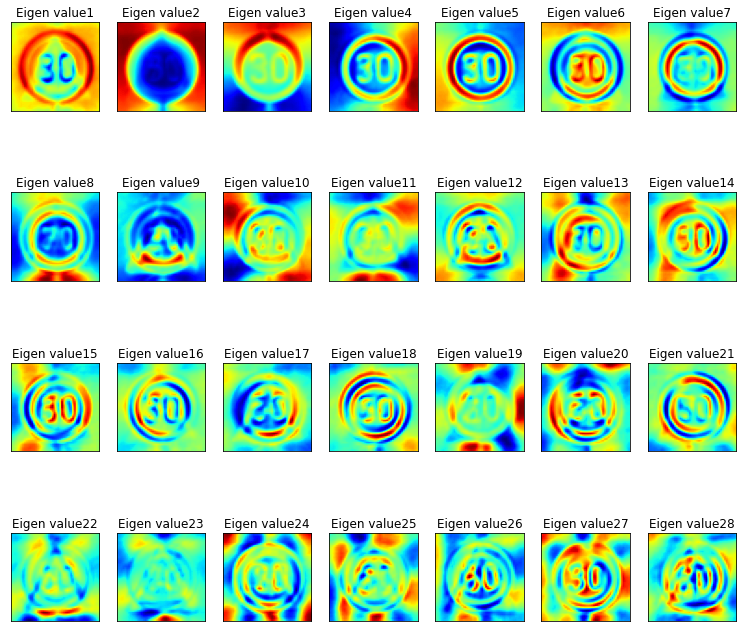

In [57]:
#plotting eigen values
plt.figure(figsize=(13,12))

x_row=4
y_col=7

for i in list(range(x_row*y_col)):
    
    plt.subplot(x_row,y_col,i+1)
    plt.imshow(eigenvalues[i].reshape(48,48),cmap='jet')
    title_='Eigen value'+str(i+1)
    plt.title(title_)
    plt.xticks(())
    plt.yticks(())
plt.show() 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

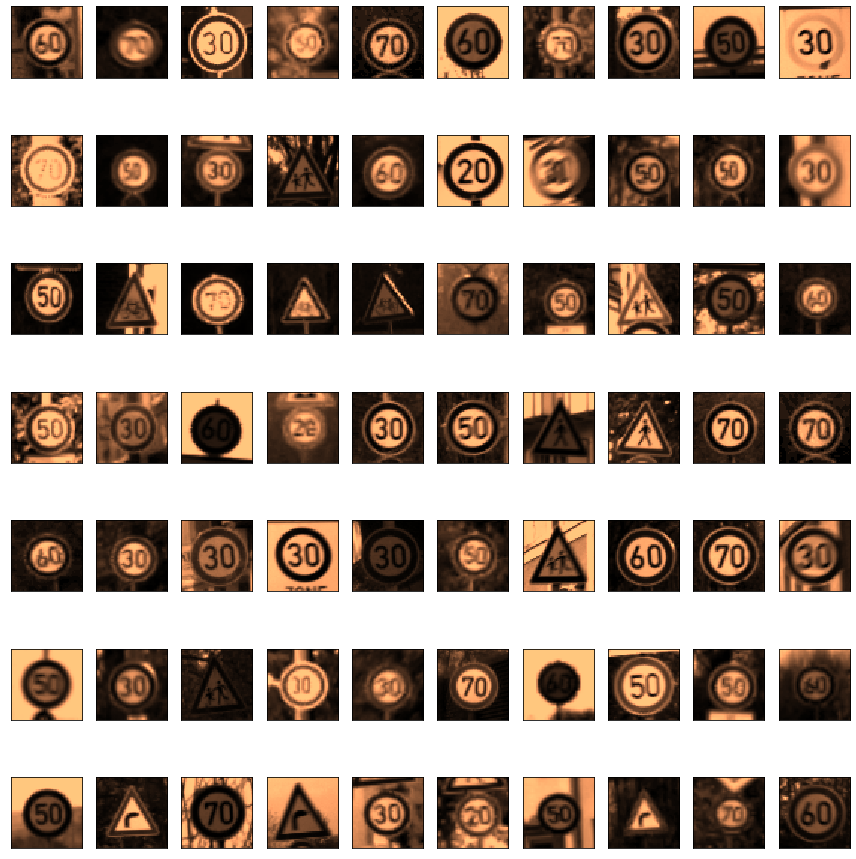

In [60]:
#plotting the actual data

plt.figure(figsize=(12,13))

for i in list(range(0,70)):
    plt.subplot(7,10,i+1)
    
    plt.imshow(XYraw.iloc[i].values.reshape(48,48), interpolation = "none", cmap = "copper")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
               
plt.tight_layout

In [109]:
#standardising data and implementing pca

X_=XYraw[:9060].values
X_std_=StandardScaler().fit_transform(X_)
pca_=PCA(0.95)
X_10d=pca_.fit_transform(X_std_)
Target=target[:9060]



In [110]:
X_std_

array([[-0.91039505, -0.9359477 , -0.94669805, ..., -0.73300072,
        -0.70085261, -0.63469739],
       [-0.70350849, -0.69000136, -0.68765381, ..., -0.44994315,
        -0.40038547, -0.33484612],
       [-0.7164389 , -0.71589045, -0.68765381, ..., -0.27696353,
        -0.27387299, -0.3979727 ],
       ...,
       [ 1.68861734,  1.6400166 ,  0.27080988, ..., -0.05680765,
         0.12147851,  0.54892606],
       [-0.4449003 , -0.35344321, -0.10480427, ..., -0.35559063,
        -0.35294329, -0.33484612],
       [-1.03969915, -1.03950405, -1.03736353, ..., -0.90598034,
        -0.90643539, -0.90298537]])

In [111]:
X_10d.shape

(9060, 73)

In [112]:
eigenvalues_=pca_.components_

In [113]:
#visualisation of pca representations

trace = go.Scatter(
    x = X_10d[:,0],
    y = X_10d[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='PCA',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='pca')

In [114]:
from sklearn.cluster import KMeans

In [115]:
print(X_std)

[[-0.9115188  -0.93695518 -0.94824968 ... -0.7340875  -0.70227982
  -0.63608289]
 [-0.70511337 -0.6915613  -0.68967289 ... -0.45193841 -0.40275509
  -0.33688455]
 [-0.71801371 -0.71739224 -0.68967289 ... -0.27951396 -0.27663942
  -0.39987367]
 ...
 [-0.27940218 -0.30409728 -0.39230957 ... -0.74976245 -0.74957319
  -0.71481929]
 [-0.92441914 -0.89820878 -0.87067664 ... -0.8281372  -0.84415995
  -0.85654482]
 [ 0.80422632  0.81954839  0.81007254 ...  1.88362912  1.8830915
   1.89922932]]


In [116]:
#Q. How to choose number of clusters?

#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=12)
#Run the clustering algorithm
model = k_means.fit(X_std)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X_std)

In [117]:
from sklearn import metrics
labels = k_means.labels_
metrics.silhouette_score(X_std, labels, metric = 'euclidean')

0.1337027150992707

In [118]:
metrics.calinski_harabasz_score(X_std, labels)

1524.5709216481516

In [119]:
k_means_8 = KMeans(n_clusters=8)
model = k_means_8.fit(X_std)
y_hat_8 = k_means_8.predict(X_std)

In [120]:
labels_8 = k_means_8.labels_
metrics.silhouette_score(X_std, labels_8, metric = 'euclidean')

0.15633422291862945

In [121]:
metrics.calinski_harabasz_score(X_std, labels_8)

2058.8490407644745

In [122]:
#for each value of k, we can initialise k_means and
#use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X_std)
    sum_of_squared_distances.append(k_means.inertia_)

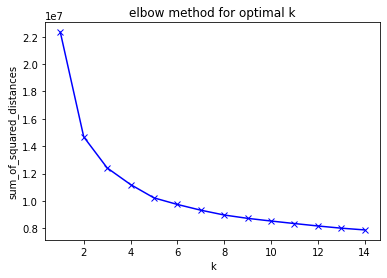

In [123]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [124]:
# from the elbow graph it seems that after 8 the drop is sum of squared distances is not
#very steep so this may mean the 8 would be ideal cluster number. Now let us try with 5
k_means_5 = KMeans(n_clusters=5)
model = k_means_5.fit(X_std)
y_hat_5 = k_means_5.predict(X_std)

In [125]:
labels_5 = k_means_5.labels_
metrics.silhouette_score(X_std, labels_5, metric = 'euclidean')


0.21469688178990604

In [126]:
metrics.calinski_harabasz_score(X_std, labels_5)

2866.310509682105

In [127]:
# but we know that we have 10 classes so ideally we would like our data to be 
#clustered into 10 classes
k_means_10 = KMeans(n_clusters=5)
model = k_means_10.fit(X_std)
y_hat_10 = k_means_10.predict(X_std)

In [128]:
# can confirm that the scores do not change much by putting 10 clusters
labels_10 = k_means_10.labels_
metrics.silhouette_score(X_std, labels_10, metric = 'euclidean')

0.2146677176551287

In [135]:
## as seen by the CHS and SS K=8 gives the best score, so cluster 8 may be ideal cluster
metrics.calinski_harabasz_score(X_std, labels_10)

2866.311025879227

In [130]:
#kmeans clustering and visiulisation on feature reduced dataset

from sklearn.cluster import KMeans
kmeans=KMeans(10)
X_clustered=kmeans.fit_predict(X_10d)

In [131]:
tracekmeans = go.Scatter(x=X_10d[:, 0], y= X_10d[:, 1], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = X_clustered,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))


layout=go.Layout(title='Kmeans clustering',
                 hovermode='closest',
                 xaxis=dict(title='first principal direction',
                           ticklen=5,
                           zeroline=False,
                           gridwidth=2),
                 yaxis=dict(title='second principal component',
                           ticklen=5,
                           gridwidth=2),
                 showlegend=True
                     )

data = [tracekmeans]
fig1 = dict(data=data, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig1, filename="svm")

In [132]:
#using LDA  (Linear Discriminant analysis)



lda=LDA(n_components=9)
X_lda = lda.fit_transform(X_std_,Target.values)

In [133]:
traceLDA=go.Scatter(x=X_lda[:,0],
                    y=X_lda[:,1],
                    #name=str(Target),
                    mode='markers',
                    #text=Target,
                    marker=dict(size=8,
                                color=Target,
                                colorscale='jet',
                                showscale=False,
                                line=dict(width=2,
                                         color='rgb(255,255,255)'
                                         ),
                                opacity=0.8
                               )
                )

data=traceLDA

layout=go.Layout(xaxis=dict(title='First Linear discriminant',
                           ticklen=5,
                           gridwidth=2),
                yaxis=dict(title='Second linear discriminant',
                           ticklen=5,
                           gridwidth=2),
                 title='LDA',
                 showlegend=True,
                 hovermode='closest')

fig=dict(data=data,layout=layout)
py.iplot(fig)

In [134]:
#changeing seed experiments on 10 clusters and inertia (how far away the points within a cluster)
#and silhouette (how far away the datapoints in one cluster) as read outs for cluster quality

from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=10, n_init=10, max_iter=300, random_state=42 )
kmeans.fit(XYraw) #Replace your training dataset instead of x_train
# The lowest SSE value
print(kmeans.inertia_)
# Final locations of the centroid
print(kmeans.cluster_centers_)
# The number of iterations required to converge
print(kmeans.n_iter_)
# first ten predicted labels 
print(kmeans.labels_[:10])
metrics.silhouette_score(XYraw, labels_10, metric = 'euclidean')

37365215591.4268
[[ 43.80961538  43.6625      43.43942308 ...  37.63221154  37.64519231
   37.61442308]
 [ 29.33239595  29.05905512  28.85939258 ...  21.51237345  21.43419573
   21.65804274]
 [233.09174312 231.58715596 228.6116208  ... 158.83486239 157.0030581
  156.33333333]
 ...
 [120.34926829 120.31804878 120.73853659 ... 124.40878049 123.62341463
  123.38243902]
 [100.21573034  99.6988764   99.16741573 ...  76.82359551  74.07078652
   72.01573034]
 [108.53758325 108.98001903 108.2226451  ...  62.69457659  63.51284491
   63.61274976]]
24
[1 3 8 8 1 2 3 7 6 4]


0.21445563143652133

In [101]:
kmeans = KMeans(init="random", n_clusters=10, n_init=100, max_iter=300, random_state=42 )
kmeans.fit(XYraw) #Replace your training dataset instead of x_train
# The lowest SSE value
print(kmeans.inertia_)
# Final locations of the centroid
print(kmeans.cluster_centers_)
# The number of iterations required to converge
print(kmeans.n_iter_)
# first five predicted labels 
print(kmeans.labels_[:10])
metrics.silhouette_score(XYraw, labels_10, metric = 'euclidean')

37365215591.4268
[[ 43.80961538  43.6625      43.43942308 ...  37.63221154  37.64519231
   37.61442308]
 [ 29.33239595  29.05905512  28.85939258 ...  21.51237345  21.43419573
   21.65804274]
 [233.09174312 231.58715596 228.6116208  ... 158.83486239 157.0030581
  156.33333333]
 ...
 [120.34926829 120.31804878 120.73853659 ... 124.40878049 123.62341463
  123.38243902]
 [100.21573034  99.6988764   99.16741573 ...  76.82359551  74.07078652
   72.01573034]
 [108.53758325 108.98001903 108.2226451  ...  62.69457659  63.51284491
   63.61274976]]
24
[1 3 8 8 1 2 3 7 6 4]


0.21445612462433253

In [103]:
kmeans = KMeans(init="random", n_clusters=10, n_init=50, max_iter=300, random_state=42 )
kmeans.fit(XYraw) #Replace your training dataset instead of x_train
# The lowest SSE value
print(kmeans.inertia_)
# Final locations of the centroid
print(kmeans.cluster_centers_)
# The number of iterations required to converge
print(kmeans.n_iter_)
# first five predicted labels 
print(kmeans.labels_[:10])
metrics.silhouette_score(XYraw, labels_10, metric = 'euclidean')

37365215591.4268
[[ 43.80961538  43.6625      43.43942308 ...  37.63221154  37.64519231
   37.61442308]
 [ 29.33239595  29.05905512  28.85939258 ...  21.51237345  21.43419573
   21.65804274]
 [233.09174312 231.58715596 228.6116208  ... 158.83486239 157.0030581
  156.33333333]
 ...
 [120.34926829 120.31804878 120.73853659 ... 124.40878049 123.62341463
  123.38243902]
 [100.21573034  99.6988764   99.16741573 ...  76.82359551  74.07078652
   72.01573034]
 [108.53758325 108.98001903 108.2226451  ...  62.69457659  63.51284491
   63.61274976]]
24
[1 3 8 8 1 2 3 7 6 4]


0.21445612462433253

In [104]:
# read data with reduced features 
Top_20_Exploratory = pd.read_csv ('Top_20_Exploratory_random.csv')

In [105]:
# investigate clstering and class assignment in the best feature reduced dataset from previous experiments
#carry out investigations with different number of seeds

from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=10, n_init=10, max_iter=300, random_state=42 )
kmeans.fit(Top_20_Exploratory) #Replace your training dataset instead of x_train
# The lowest SSE value
print(kmeans.inertia_)
# Final locations of the centroid
print(kmeans.cluster_centers_)
# The number of iterations required to converge
print(kmeans.n_iter_)
# first ten predicted labels 
print(kmeans.labels_[:10])
metrics.silhouette_score(XYraw, labels_10, metric = 'euclidean')

1408557024.8321579
[[243.02821317 245.53918495 244.35266458 ... 165.42319749  81.7476489
    1.75705329]
 [110.33079268  75.69817073  63.6554878  ... 118.69969512  69.07164634
    6.32926829]
 [180.70899471 142.12169312 103.83597884 ... 217.86243386  99.89153439
    7.15079365]
 ...
 [204.48185484 196.46169355 190.86491935 ... 138.3891129  171.76612903
    1.53024194]
 [252.45454545 246.27160494 246.44668911 ... 167.52861953  97.09539843
    2.46801347]
 [188.90551181 153.52624672 159.10761155 ...  83.02493438  77.75459318
    2.41469816]]
26
[6 9 9 4 6 3 3 3 8 3]


0.21445612462433253

In [107]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=10, n_init=50, max_iter=300, random_state=42 )
kmeans.fit(Top_20_Exploratory) #Replace your training dataset instead of x_train
# The lowest SSE value
print(kmeans.inertia_)
# Final locations of the centroid
print(kmeans.cluster_centers_)
# The number of iterations required to converge
print(kmeans.n_iter_)
# first ten predicted labels 
print(kmeans.labels_[:10])
metrics.silhouette_score(XYraw, labels_10, metric = 'euclidean')

1408524274.9363992
[[252.37357631 246.00911162 246.25056948 ... 168.08428246  96.68109339
    2.46697039]
 [189.14566929 153.96325459 159.20341207 ...  82.74146982  77.48031496
    2.4160105 ]
 [ 87.86046512  77.02657807  79.02847651 ...  49.54817276  44.96962506
    3.12055055]
 ...
 [ 84.86298932  80.28291815  84.49288256 ...  63.25088968 162.74021352
    3.11032028]
 [180.84408602 142.72311828 104.23387097 ... 218.55913978 100.2688172
    7.13978495]
 [ 41.9800554   38.23601108  37.44210526 ...  26.07423823  26.28698061
    3.70138504]]
62
[9 1 1 5 9 2 2 2 0 2]


0.21445612462433253

In [108]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=10, n_init=100, max_iter=300, random_state=42 )
kmeans.fit(Top_20_Exploratory) #Replace your training dataset instead of x_train
# The lowest SSE value
print(kmeans.inertia_)
# Final locations of the centroid
print(kmeans.cluster_centers_)
# The number of iterations required to converge
print(kmeans.n_iter_)
# first ten predicted labels 
print(kmeans.labels_[:10])
metrics.silhouette_score(XYraw, labels_10, metric = 'euclidean')

1408514876.0293963
[[ 87.82897862  76.92446556  78.93396675 ...  49.53396675  44.84275534
    3.12446556]
 [189.17408377 154.07068063 159.33115183 ...  82.87827225  77.43586387
    2.41623037]
 [150.90200286 141.63733906 143.00429185 ...  80.73533619  74.14949928
    1.96709585]
 ...
 [180.95405405 142.97567568 104.41891892 ... 218.71081081 100.59189189
    7.13783784]
 [ 41.9800554   38.23601108  37.44210526 ...  26.07423823  26.28698061
    3.70138504]
 [252.37357631 246.00911162 246.25056948 ... 168.08428246  96.68109339
    2.46697039]]
56
[8 1 1 2 8 0 0 0 9 0]


0.21445612462433253